In [6]:
options(repr.plot.res=200)
options(tibble.width = Inf) # displays all columns.
options(tibble.print_max = 500) # to show all the rows.

In [1]:
library(tidyverse)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.5     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.0.2     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
options(repr.tibble.max.cols=Inf, repr.matrix.max.rows=100)

- R

In [3]:
simulate_starforce <- function(L, N){ # l은 장비의 레벨 제한, N은 목표 레벨
    
    
    cost = rep(NA,25)    
    sccss_prob = rep(NA, 25)
    dstry_prob = rep(NA, 25)
    
    for (i in 1:25){ # i : 목표 레벨
        S = i - 1 # S : 현재 레벨
        
    # 강화 비용 지정
        if (S <=9) cost[i] = 1000 + L**3 *(S+1)/25
        else if (S <=14) cost[i] = 1000 + L**3 *(S+1)**2.7 /400
        else if (S <=24) cost[i] = 1000 + L**3 *(S+1)**2.7 /200
        
    # 성공 확률 지정
        if (S <= 2) sccss_prob[i] = (95-5*S)/100
        else if (S <= 14) sccss_prob[i] = (100 - 5*S)/100
        else if (S <= 21) sccss_prob[i] = (30)/100
        else if (S == 22) sccss_prob[i] = (3)/100
        else if (S == 23) sccss_prob[i] = (2)/100
        else if (S == 24) sccss_prob[i] = (1)/100
    }
    cost = round(cost, -2)
    # 파괴 확률 지정
    dstry_prob = c(rep(0, 12), 0.6, 1.3, 1.4, 2.1, 2.1, 2.1, 2.8, 2.8, 7.0, 7.0, 19.4, 29.4, 39.6)/100
    
    # 실패 확률 지정 (파괴X)
    fail_prob = 1-(sccss_prob + dstry_prob)
    
    
    S = 0 # 현재 레벨
    ss_cost = 0 # 비용 합계
    while (S != N){
        ss_cost = ss_cost + cost[S+1]
        stt = sample(c('T', 'F', 'D'), 1, prob = c(sccss_prob[S+1], fail_prob[S+1], dstry_prob[S+1]))
        if (stt == "T"){
            S = S + 1
        }
        else if (stt == "F"){
            if ((!(S%%5 == 0))&S>=6) S = S-1      
        }
        else if (stt == "D"){
            return(list(L, N, ss_cost, "dst"))
            break
        }
    }
    return(list(L, N, ss_cost, "scc"))
}

In [4]:
rslt = matrix(rep(NA, 500*4), ncol = 4)
rslt = as_tibble(rslt)

colnames(rslt) = c("limit", "target", "meso", "result")

for (i in 1:500){
   rslt[i,] = simulate_starforce(200, 22)
}

Warning message:
"The `x` argument of `as_tibble.matrix()` must have unique column names if `.name_repair` is omitted as of tibble 2.0.0.
Using compatibility `.name_repair`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated."


In [15]:
##options(tibble.width = Inf) # displays all columns.
##options(tibble.print_max = Inf) # to show all the rows.
print(tbl_df(rslt), n=500)

# A tibble: 500 x 4
    limit target        meso result
    <dbl>  <dbl>       <dbl> <chr> 
  1   200     22   819548100 dst   
  2   200     22  6406910200 dst   
  3   200     22  3054291100 dst   
  4   200     22   734846100 dst   
  5   200     22  5641519700 dst   
  6   200     22  3706503800 dst   
  7   200     22  3160902900 dst   
  8   200     22   258692700 dst   
  9   200     22  2761502800 dst   
 10   200     22  3021910500 dst   
 11   200     22  7195895500 dst   
 12   200     22  1061266900 dst   
 13   200     22  3842152200 scc   
 14   200     22  1045733100 dst   
 15   200     22  4224061600 dst   
 16   200     22   513520800 dst   
 17   200     22   426041500 dst   
 18   200     22  2744729900 dst   
 19   200     22  2167050200 dst   
 20   200     22  1365574600 dst   
 21   200     22  2233829500 scc   
 22   200     22   620733900 dst   
 23   200     22 25754849100 dst   
 24   200     22  2431156300 dst   
 25   200     22  4729183000 dst   
 26   20

In [7]:
head(data.frame(rslt), 200)

,limit,target,meso,result
,<dbl>,<dbl>,<dbl>,<chr>
1,200,22,819548100,dst
2,200,22,6406910200,dst
3,200,22,3054291100,dst
4,200,22,734846100,dst
5,200,22,5641519700,dst
6,200,22,3706503800,dst
7,200,22,3160902900,dst
8,200,22,258692700,dst
9,200,22,2761502800,dst


[1] 40401.6

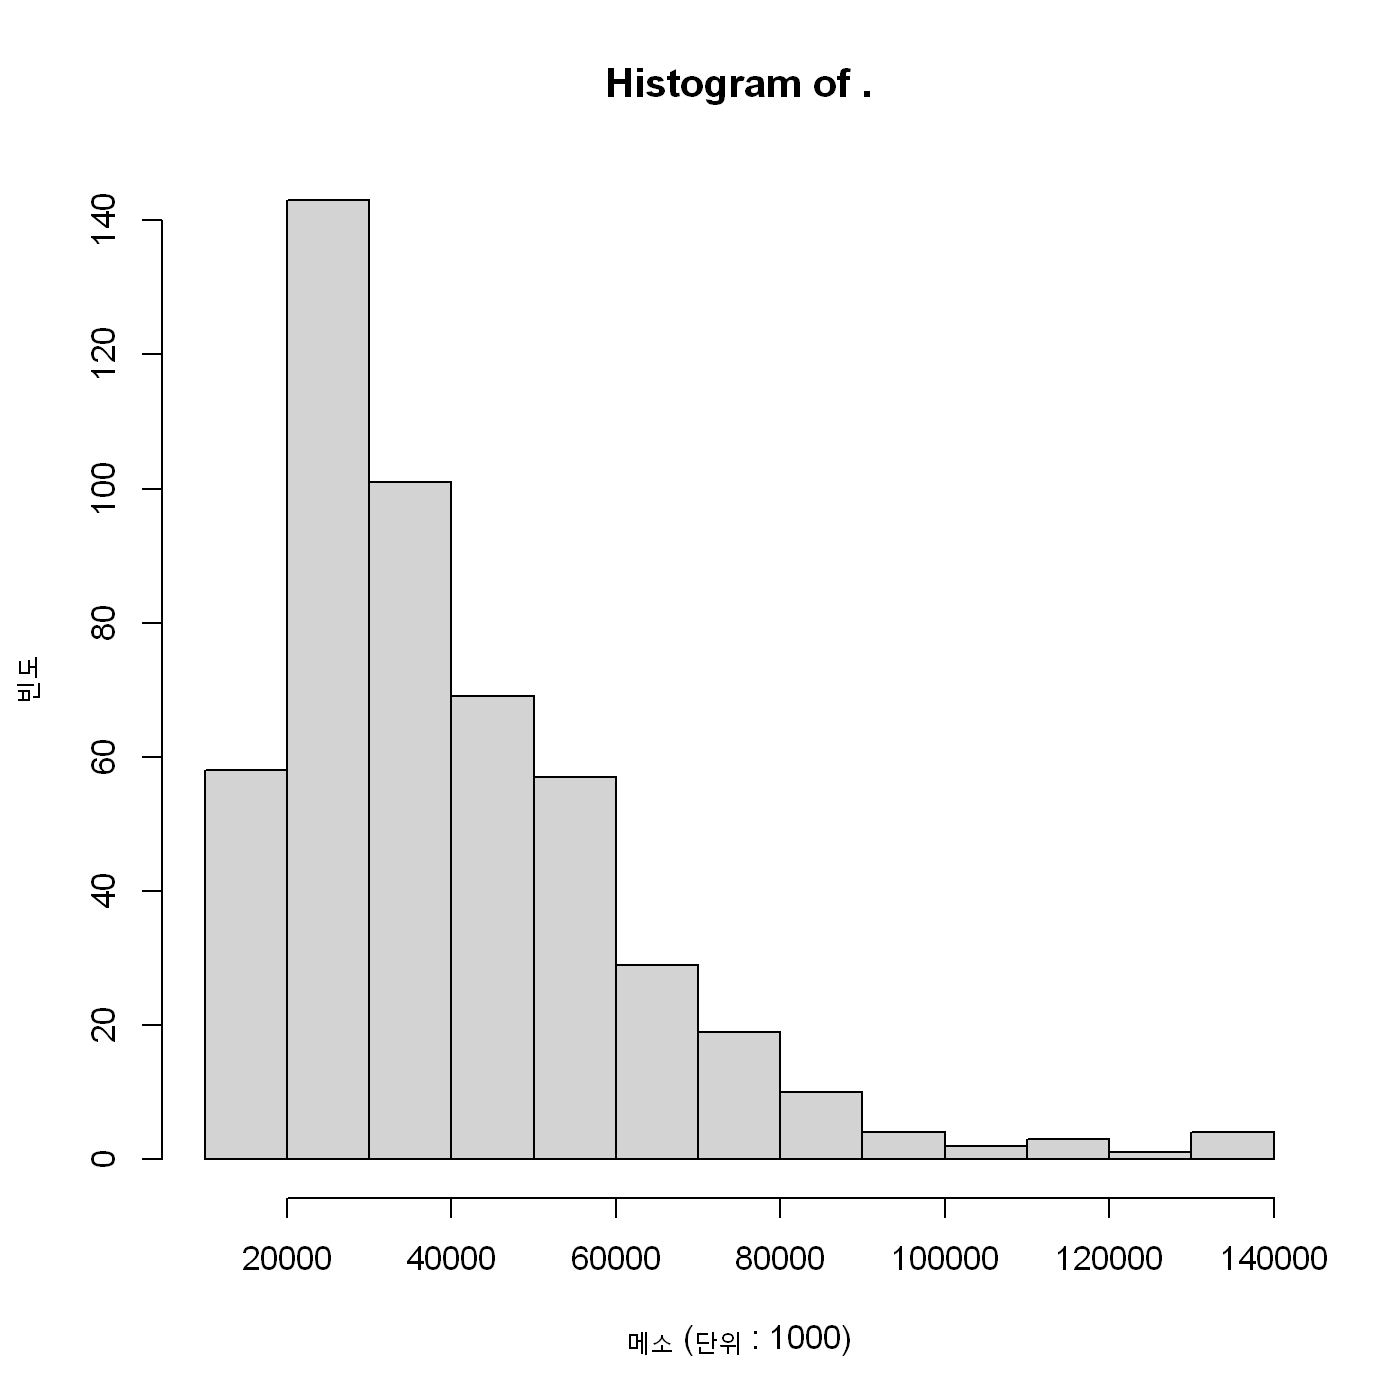

In [51]:
AA = rslt %>% filter(결과 == "성공") %>% select(3) %>% t
AA = AA / 1000
AA %>% as.numeric %>% hist(xlab = "메소 (단위 : 1000)", ylab = "빈도")
mean(AA)

In [44]:
rslt = matrix(rep(NA, 500*4), ncol = 4)
rslt = as_tibble(rslt)

colnames(rslt) = c("장비 레벨 제한", "목표 강화 단계", "사용 메소", "결과")
mean_mean = c()

for (j in 1:1000){ # 표본 평균의 평균
    for (i in 1:500){ # 표본 평균
       rslt[i,] = simulate_starforce(200, 10)
    }
    AA = rslt %>% filter(결과 == "성공") %>% select(3) %>% t
    AA = AA / 1000
    mean_mean[j] = AA %>% as.numeric %>% mean
    
}

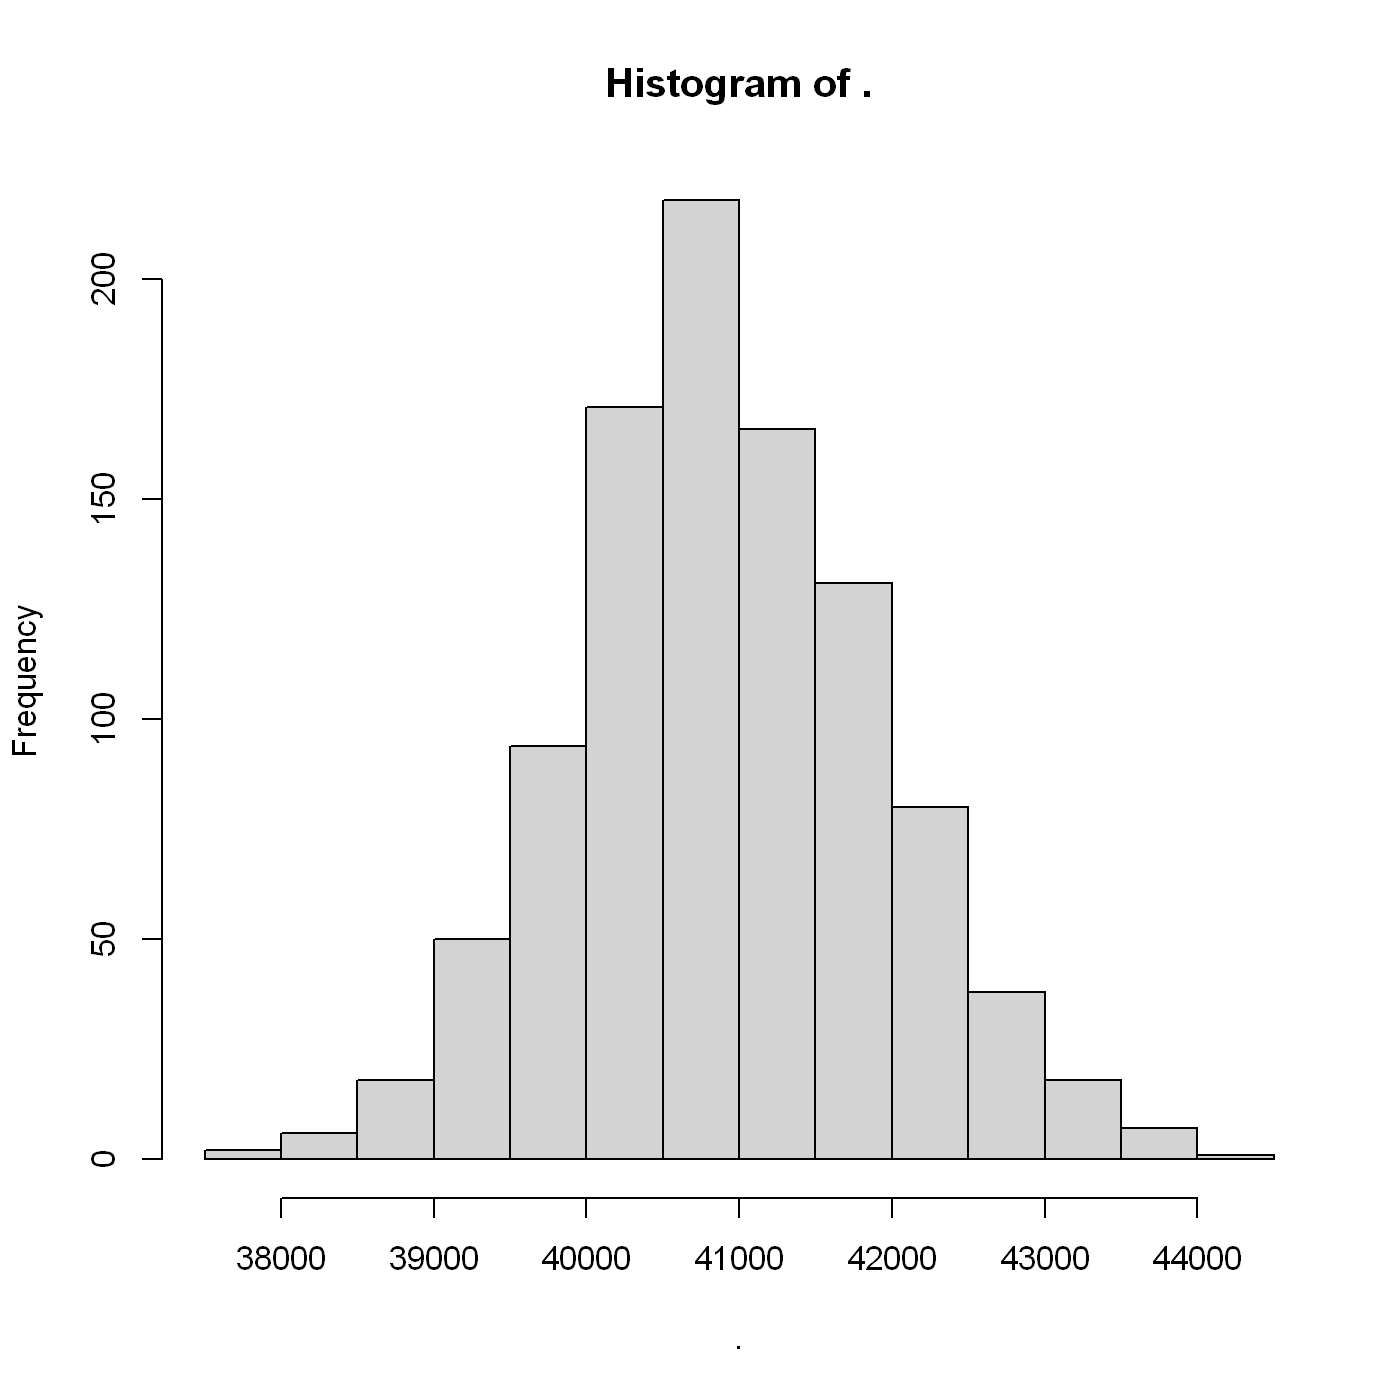

In [45]:
mean_mean %>% hist

In [3]:
mean_meso <- function(L){
    matt = matrix(rep(NA, 12*3), ncol = 3)
    matt = as_tibble(matt)
    colnames(matt) = c("장비 레벨 제한", "목표 강화 단계", "평균적으로 필요한 메소")
    for (k in 1:12){
        meso = c()
        for (i in 1:500){
           meso[i] = simulate_starforce(200, k)[[3]]
        }
        matt[k, 3] = meso %>% mean
        matt[, 1] = L
        matt[k, 2] = k
    }
    return(matt)
}
mean_meso(150)

Warning message:
"The `x` argument of `as_tibble.matrix()` must have unique column names if `.name_repair` is omitted as of tibble 2.0.0.
Using compatibility `.name_repair`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated."


장비 레벨 제한,목표 강화 단계,평균적으로 필요한 메소
<dbl>,<int>,<dbl>
150,1,334482
150,2,1035738
150,3,2164602
150,4,3715268
150,5,5655664
150,6,8141416
150,7,12476270
150,8,18363474
150,9,28175988


In [16]:
rslt = matrix(rep(NA, 500*4), ncol = 4)
rslt = as_tibble(rslt)

colnames(rslt) = c("장비 레벨 제한", "목표 강화 단계", "메소", "결과")

ssf = c()
for (k in 1:1000){
    for (i in 1:500){

        rslt[i,] = simulate_starforce(200, 23)
        if (rslt[i, 4] == "성공"){
            break
        }
    }
    ssf[k] =rslt %>% select(3) %>% t %>% as.numeric(na.rm=TRUE) %>% mean(na.rm=TRUE)
}

In [17]:
mean(ssf)

[1] 3976914947

In [9]:
sd(ssf)

[1] 283225937

In [65]:

tty= c()
rslt = matrix(rep(NA, 500*4), ncol = 4)
rslt = as_tibble(rslt)

colnames(rslt) = c("장비 레벨 제한", "목표 강화 단계", "메소", "결과")
for (k in 1:100){
    for (i in 1:500){
       rslt[i,] = simulate_starforce(200, 22)
    }
    tty[k] = rslt %>% filter(결과 == "성공") %>% select(3) %>% count %>% as.numeric

}
tty

[1] 34 32 25 33 29 39 28 27 32 26 28 30 34 24 19 35 32 26 21 27 23 30 26 34 25
 [26] 31 28 33 21 26 19 31 29 20 17 20 31 15 25 24 29 21 32 23 33 30 20 23 22 23
 [51] 26 25 29 30 30 26 25 22 20 22 23 26 30 22 30 26 22 35 31 24 26 19 24 28 37
 [76] 25 25 23 26 27 18 26 25 29 29 29 31 33 22 23 22 25 24 34 26 24 19 22 23 28

In [5]:
mean(tty)

[1] 27.1

In [31]:
print(matrix(rep(NA, 12*3), ncol = 3))

      [,1] [,2] [,3]
 [1,]   NA   NA   NA
 [2,]   NA   NA   NA
 [3,]   NA   NA   NA
 [4,]   NA   NA   NA
 [5,]   NA   NA   NA
 [6,]   NA   NA   NA
 [7,]   NA   NA   NA
 [8,]   NA   NA   NA
 [9,]   NA   NA   NA
[10,]   NA   NA   NA
[11,]   NA   NA   NA
[12,]   NA   NA   NA


In [32]:
?option

options {base},R Documentation
...,"any options can be defined, using name = value. However, only the ones below are used in base R. Options can also be passed by giving a single unnamed argument which is a named list."
x,a character string holding an option name.
default,"if the specified option is not set in the options list, this value is returned. This facilitates retrieving an option and checking whether it is set and setting it separately if not."
add.smooth,TRUE
check.bounds,FALSE
continue,"""+ """
digits,7
echo,TRUE
encoding,"""native.enc"""
error,NULL
